## Introducción a la ciencia de las redes: _Actividad entregable 5_

#### _Briones Andrade Joshua_

In [152]:
import numpy as np
import seaborn as sns
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from some_functions import *

In [145]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Redes regulares

In [262]:
options1 = {"edge_color": "tab:gray",  "node_size": 800, "alpha": 0.9, 
           "node_color": "tab:red", "font_size": 20, "font_color":"whitesmoke"}

options2 = {"edge_color": "0.1",  "node_size": 600, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 15, "font_color":"whitesmoke"}

options3 = {"edge_color": "0.1",  "node_size": 200, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 10, "font_color":"whitesmoke"}

options4 = {"edge_color": "0.2",  "node_size": 8, "alpha": 1, 
           "node_color": "tab:purple", "font_size": 4, "font_color":"whitesmoke"}

In [300]:
def degree_analysis(G, pos=None, title=None, with_labels=True, **options):
    
    s2, s3 = [], []
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)

    fig = plt.figure(figsize=(12, 6.5))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(6,5)

    ax0 = fig.add_subplot(axgrid[:,0:3])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    if pos == None:
        nx.draw(G, with_labels=with_labels, **options)
    else: 
        nx.draw(G, pos, with_labels=with_labels, **options)
    ax0.set_title(title)
    ax0.set_axis_off()

    ax1 = fig.add_subplot(axgrid[:2, 3:])
    k_mean = np.mean(degree_sequence)
    title1 = r"Histograma de grado: $\langle k\rangle=$" + str(k_mean)
    y1, x1 = np.unique(degree_sequence, return_counts=True)
    sns.histplot(data=degree_sequence, stat='probability', common_bins=True, common_norm=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax1.set_title(title1)
    ax1.set_xlabel("$k$")
    ax1.set_ylabel("$P(k)$")

    
    p2 = nx.clustering(G)
    for key in p2:
        s2.append(p2[key])
    s2 = np.array(s2)
    ax2 = fig.add_subplot(axgrid[2:4, 3:])
    c_mean = np.mean(s2)
    title2 = r"Clustering coefficient: $\langle C\rangle=$" + str(c_mean)
    sns.histplot(data=s2, stat='probability', common_bins=True, common_norm=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax2.set_title(title2)
    ax2.set_xlabel("$C$")
    ax2.set_ylabel("$P(C)$")

    
    p3 = dict(nx.shortest_path_length(G))
    for i in p3:
        for j in p3[i]:
            if i == j:
                pass
            else:
                s3.append(p3[i][j])
    s3 = np.array(s3)
    ax3 = fig.add_subplot(axgrid[4:, 3:])
    l_mean = np.mean(s3)
    title3 = r"Shortest-path length: $\langle l\rangle=$" + str(l_mean)
    sns.histplot(data=s3, stat='probability', common_bins=True, common_norm=True, kde=True,
                 color="orange", multiple='layer', element='bars', shrink=0.8)
    ax3.set_title(title3)
    ax3.set_xlabel("$l$")
    ax3.set_ylabel("$P(l)$")

    fig.tight_layout()
    plt.show()

### 1. a) Grado completo de 5 nodos, $\mathbb{K}_5$

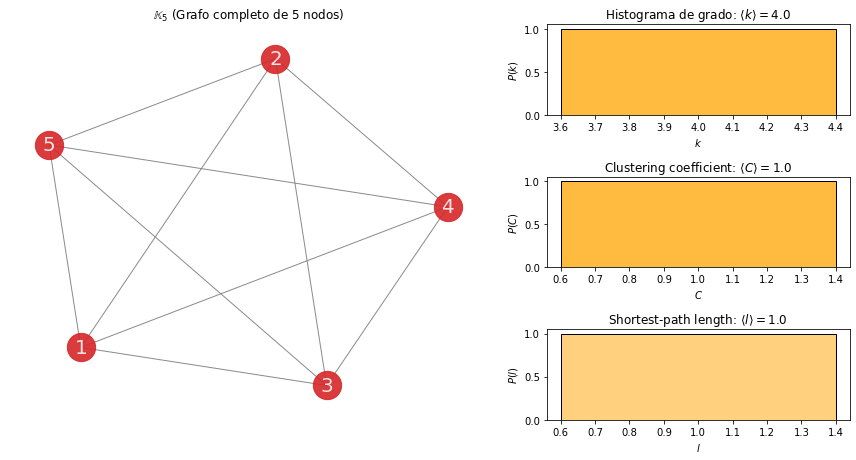

In [301]:
degree_analysis(G1, title=r"$\mathbb{K}_5$ (Grafo completo de 5 nodos)", **options1)

### 1. b) Árbol binario de $n$ niveles

In [302]:
def sum_powers(n):
    if n == 0:
        s = 1
    else:
        s = 2**n + sum_powers(n-1)
    return s 
# --------------------------------------------------
def dict_binary_tree(n):
    B = dict()
    s = []
    for i in range(sum_powers(n)):
        B[i+1] = 0
    for j in range(n+1):
        s.append(range(2**j, sum_powers(j)+1))
    for j in range(n):
        for k in range(len(s[j])):
            B[s[j][k]] = s[j+1][2*k], s[j+1][2*k+1]
    return B
# --------------------------------------------------
def binary_tree(n):
    B = dict_binary_tree(n)
    G = nx.Graph()
    s = []
    for i in B:
        if B[i] == 0:
            pass
        else:
            for j in B[i]:
                G.add_edge(i,j)
    return G

<Figure size 1080x360 with 0 Axes>

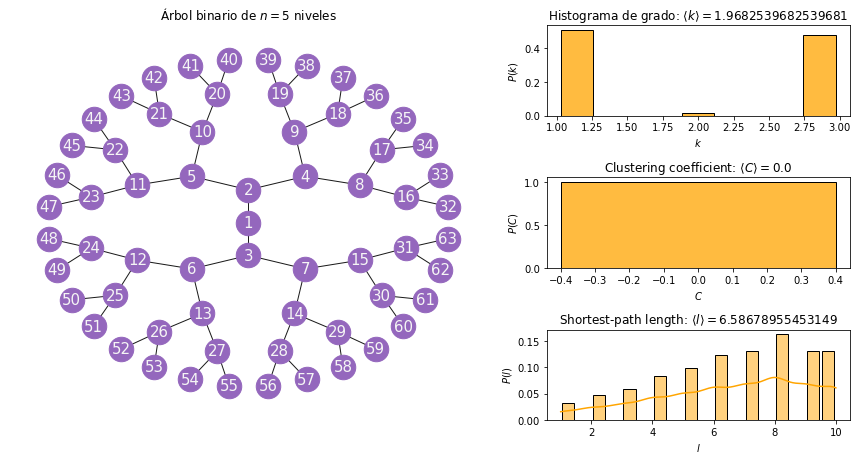

In [303]:
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

G2 = binary_tree(5)

pos = graphviz_layout(G2, prog="twopi")
plt.figure(figsize=(15,5))

degree_analysis(G2, pos=pos, title=r"Árbol binario de $n=5$ niveles", **options2)

### 1. c) Grafo regular de 1D

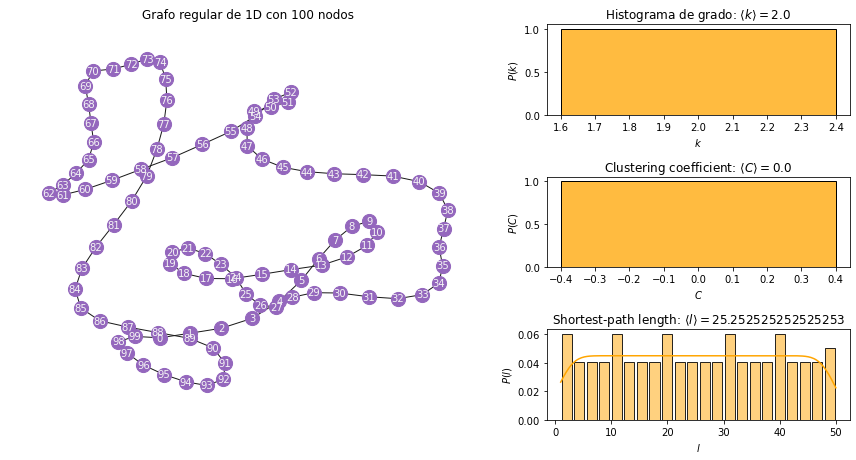

In [304]:
G3 = nx.grid_graph([100], periodic=True)

degree_analysis(G3, title=r"Grafo regular de 1D con 100 nodos", **options3)

### 1. d) _Lattice_ regular de 2D

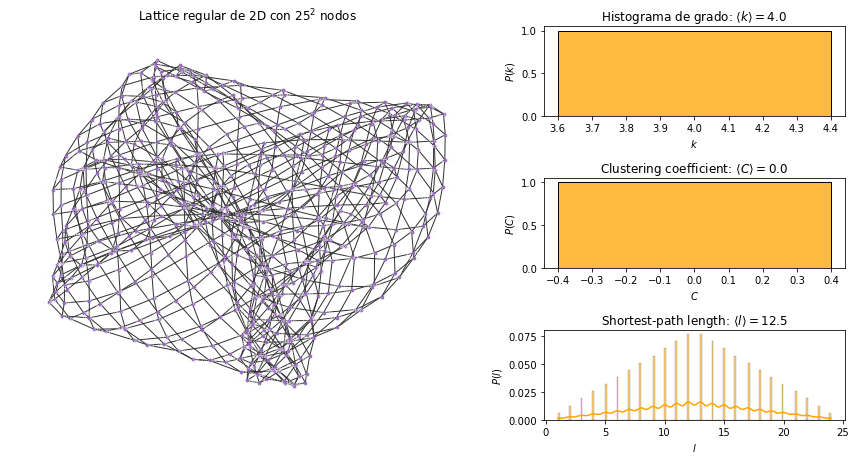

In [305]:
G4 = nx.grid_graph([25,25], periodic=True)

degree_analysis(G4, title=r"Lattice regular de 2D con $25^2$ nodos", **options4)